TASK 1 -  WEB SCRAPPING

In [2]:
pip install requests beautifulsoup4


Note: you may need to restart the kernel to use updated packages.


In [21]:
import requests
from bs4 import BeautifulSoup
import csv
import matplotlib.pyplot as plt

# Target website
url = "http://books.toscrape.com/"

# Send a GET request
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# Prepare CSV file to save results
book_data = []
in_stock_count = 0
out_of_stock_count = 0

with open("books.csv", "w", newline='', encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(["Title", "Price", "Availability"])

    # Find all book containers
    books = soup.find_all("article", class_="product_pod")

    for book in books:
        title = book.h3.a["title"]
        price = book.find("p", class_="price_color").text
        availability = book.find("p", class_="instock availability").text.strip()

        # Count stock status
        if "In stock" in availability:
            in_stock_count += 1
        else:
            out_of_stock_count += 1

        writer.writerow([title, price, availability])
        book_data.append((title, price, availability))
        print(f"Saved: {title}")

print("Scraping complete. Data saved to 'books.csv'.")




Saved: A Light in the Attic
Saved: Tipping the Velvet
Saved: Soumission
Saved: Sharp Objects
Saved: Sapiens: A Brief History of Humankind
Saved: The Requiem Red
Saved: The Dirty Little Secrets of Getting Your Dream Job
Saved: The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull
Saved: The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics
Saved: The Black Maria
Saved: Starving Hearts (Triangular Trade Trilogy, #1)
Saved: Shakespeare's Sonnets
Saved: Set Me Free
Saved: Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)
Saved: Rip it Up and Start Again
Saved: Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991
Saved: Olio
Saved: Mesaerion: The Best Science Fiction Stories 1800-1849
Saved: Libertarianism for Beginners
Saved: It's Only the Himalayas
Scraping complete. Data saved to 'books.csv'.


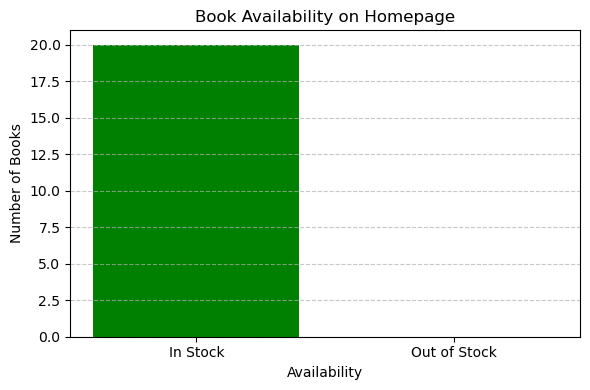

In [22]:

labels = ["In Stock", "Out of Stock"]
counts = [in_stock_count, out_of_stock_count]

plt.figure(figsize=(6, 4))
plt.bar(labels, counts, color=["green", "red"])
plt.title("Book Availability on Homepage")
plt.xlabel("Availability")
plt.ylabel("Number of Books")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("availability_chart.png")  # Save the chart as an image
plt.show()